# Housing Market - Linear Regression Analysis

### Eric Au

### The Business Problem: 

The King County Housing Authority (KCHA) wants to look into building a new community of family homes in King County (located in Washington State and near Seattle). Along with the King Contractors (KC), the KCHA needs a better idea on what metrics influence the sale price of a home and would like to get a sense of how to price these homes. KCHA and KC would like to bring on engineers and architects to assist with the design of these homes but need to understand how the sale price of the home will change depending on the design parameters. 

**The intention is to develop a sale price algorithm to help set a target price for a new housing development in King County.** 

 - The main purpose of this algorithm is predictive, meaning that the model should be able to take in attributes of a home that does not yet have a set price, and to predict a sale price for that home. 
 

 - We will also take a look at the model's attributes and explain possible relationships between the attributes of a home and its price. 

Other issues to consider:
- KCHA would also like to set aside percentage development of homes for low-income affordable housing. KCHA have defined a home to qualify for affordable housing if it sells for less than $300,000 (RESEARCH AND CONFIRM THIS). What type of home build would best accomodate low income housing?


**Stakeholders:** The King County Housing Authority (KCHA), King Contractors (KC), prospective architects and engineers. 



# 1. Initial Dataset Assessment

### Library Imports

In [1]:
# Basic imports
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# Metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

### What does the data look like?
Lets first load in the data set for housing data in King County and then perform some initial glimpses into the dataset. 

In [2]:
# to just show all columns moving forward
pd.set_option('display.max_columns', None)

# load in dataset
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


For further reference in this project, the following markdown file was also provided to give context and description to the columns. 

In [3]:
# load in the markdown file for column names and descriptions
display(Markdown("data/column_names.md"))

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [4]:
print('We have', df.shape[0], 'rows and', df.shape[1], 'columns in our dataset.')

We have 21597 rows and 21 columns in our dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

First we notice that there are missing values for the following columns: `waterfront`, `view`, and `yr_renovated`. We will check this further during the cleaning phase. 

Additionally, we have mainly float or integer type columns with several columns that are categorical variables and are classified as object types (6 total). I may also want to change the `date` to a datetime datatype moving forward. 

In [6]:
# summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


These are a few things we can take from this. Some that stand out: 

- The maximum amount of bedrooms is 33! This seems very high, unless we are talking about a mansion? Maybe this represents the total amount of bedrooms for an apartment complex?


- The range for floors is between 1-3.5 floors. Can a building floor be designated by 0.5 increments? Typically no, but can examine closer. 


- Possible outliers in `sqft_living` as the max value is 13,540 SF. 


- The range for the `yr_built` is between 1900 and 2015. Additionally, there are likely many 0 values for `yr_renovated`; this could mean that the home was never renovated and a value of 0 was placed instead. 

### Preliminary Correlation

Since we are trying to determine sale price of a home, we will look at the remaining variables as predictors. As a baseline, lets first look at a correlation between the sale price and predictors. 

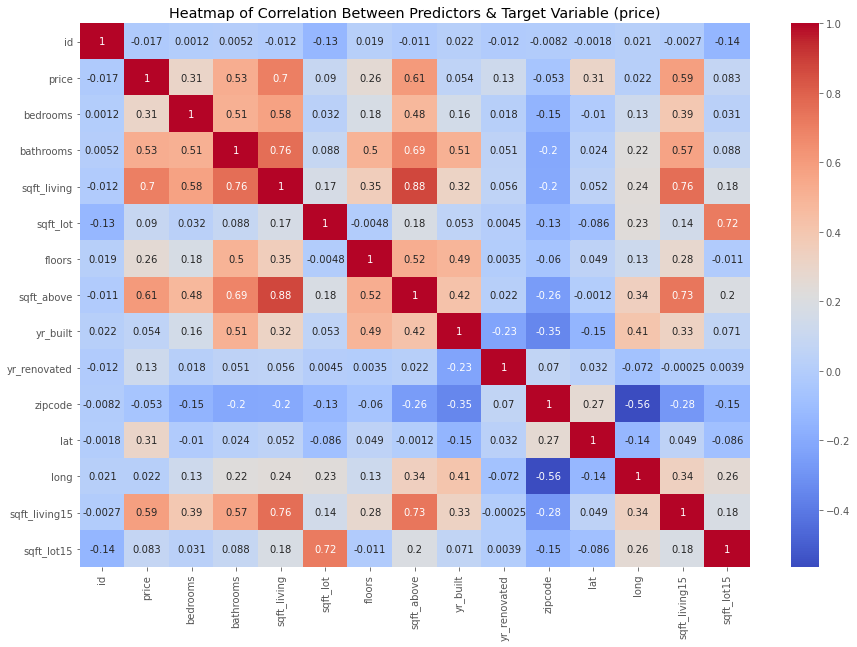

In [7]:
# set up figure size
fig, ax = plt.subplots(figsize=(15, 10))

# set up correlation matrix
corr = df.corr()

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Predictors & Target Variable (price)");

plt.show()

At this point before preprocessing and selecting any features to predict, we can see that the top 5 highest predictor correlations with price are `sqft_living`, `sqft_above`, `sqft_living15`, `bathrooms`, and `bathrooms` & `latitude` tied for 5th. 

However, these may be good predictor values for now, but we need to do some cleaning and preprocessing before we can interpret. There may also be multicollinearity between these variables. 

For now, lets set up a simple visualization and baseline model using `sqft_living` as it is the highest correlated predictor. 

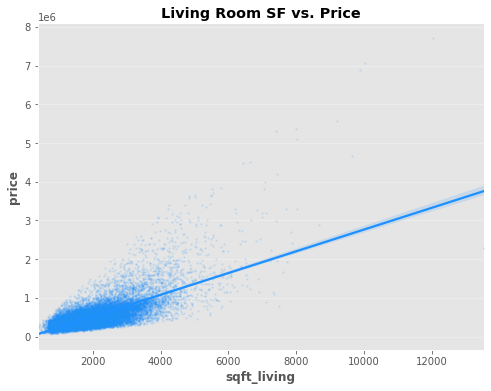

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(df['sqft_living'], df['price'], 
            scatter_kws={'s':2, 'alpha': 0.1}, 
            color = 'dodgerblue')

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('sqft_living', weight = 'bold')
ax.set_ylabel("price", weight = 'bold')
ax.set_title("Living Room SF vs. Price", weight = 'bold')

plt.show()
fig.savefig('images/livingroomVSprice.png');

### Handle Initial Outliers - `Bedrooms`
We initially saw that there was a property that has 33 total bedrooms. This is definitely an outlier as shown in the below histogram for the bedrooms. 

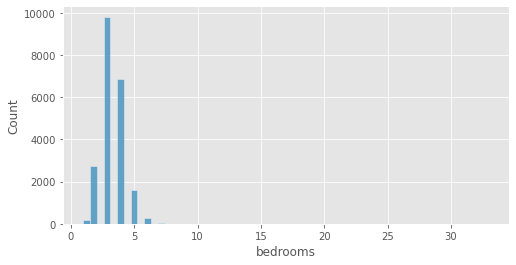

In [9]:
# plot distribution of bedrooms in the dataset
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(df['bedrooms'], bins = 60)
plt.show()

In [10]:
# lets limit to 10 and find properties with more than 10 bedrooms. 
df[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,Average,7 Average,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


There are two properties in the entire dataset with more than 10 bedrooms. This could influence our analysis later, so moving forward these rows will be removed from the dataset. 

In [11]:
# only include properties with less than or equal to 10 bedrooms
df = df[df['bedrooms'] <= 10]

In [12]:
# check to see we removed the two outliers; previously 21597 rows
len(df)

21595

### Handle Initial Outliers - `sqft_living`

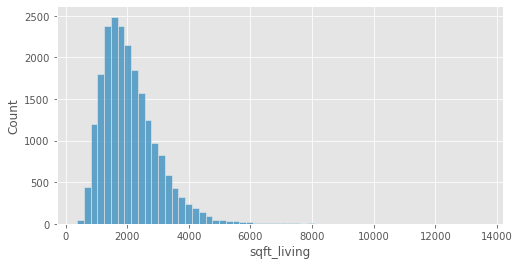

In [13]:
# plot distribution of sqft_living in the dataset
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(df['sqft_living'], bins = 60)
plt.show()

In [14]:
# lets limit to find properties with more than 8,000 SF in the living room
# 8,000 set as a baseline based visually on long tailed distribution, and compared to mid 75%
len(df[df['sqft_living'] > 8000])

9

In [15]:
# only include properties with less than or equal to 8000 SF
df = df[df['sqft_living'] <= 8000]
len(df)

21586

### Test-Train Split

The prediction target for this analysis is the sale price of the home, so the data will be separated into `X` and `y` accordingly: 

In [16]:
# set up our target variable for train-test split
y = df["price"]
X = df.drop("price", axis=1)

In [17]:
# seprate the data into a train test split prior to performing preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16189 rows and 20 columns
y_train is a Series with 16189 values


### Baseline Model

Since we first identified the `sqft_living` as the highest correlated predictor with our target variable `price`, lets test this predictor as a baseline model before proceeding with preprocessing and cleaning. 

In [19]:
# select our best correlated predictor, as our X Train
base_X_train = X_train[['sqft_living']]

# Do the same for X Test
base_X_test = X_test[['sqft_living']]

In [20]:
# instantiate the baseline model
baseline_model = LinearRegression()

# Fit our model
baseline_model.fit(base_X_train, y_train)

LinearRegression()

In [21]:
# Get our R2 score
print('Base Training R2:', round(baseline_model.score(base_X_train, y_train), 4))
print('Base Test R2:', round(baseline_model.score(base_X_test, y_test), 4))
print()

# set up a validation model 
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=base_X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("Baseline Model Train score:     ", round(baseline_scores["train_score"].mean(), 4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(), 4))
print()

# Calculate predictions on training and test sets
train_preds = baseline_model.predict(base_X_train)
test_preds = baseline_model.predict(base_X_test)

# Calculate training and test MSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 2)))

Base Training R2: 0.4848
Base Test R2: 0.475

Validation Checks
Baseline Model Train score:      0.4833
Baseline Model Validation score: 0.4889

Train Root Mean Squarred Error: 257795.89554923214
Test Root Mean Squarred Error: 244080.3098780447
Difference in RMSE for Test/Train: 13715.59


So our baseline Coefficient of Determination, R2, is not that great right now at 0.48. We'll use this as a baseline moving forward and see if we can improve on this. 

The Training and Test scores are actually quite close to each other too, so this is pretty good and means the baseline model is not underfit. 

### Polynomial Relationship?

Prior to performing any preprocessing with multiple variables, lets see what happens to the baseline model when we apply a quadratic transformation to the predictor baseline variable of `sqft_living`. 

In [22]:
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])
poly_sqft

array([[1.000000e+00, 1.320000e+03, 1.742400e+06],
       [1.000000e+00, 2.090000e+03, 4.368100e+06],
       [1.000000e+00, 2.430000e+03, 5.904900e+06],
       ...,
       [1.000000e+00, 2.450000e+03, 6.002500e+06],
       [1.000000e+00, 3.800000e+02, 1.444000e+05],
       [1.000000e+00, 2.414000e+03, 5.827396e+06]])

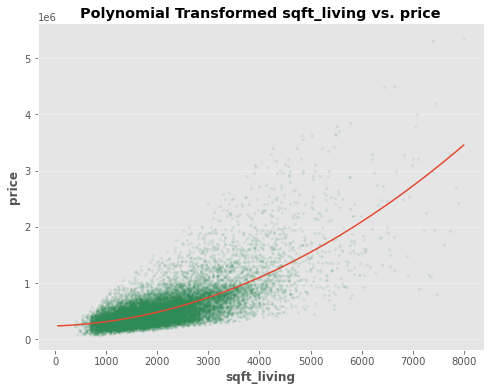

In [23]:
# instantiate a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(base_X_train)

# fit X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# create line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# create poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# set up fig
fig, ax = plt.subplots(figsize=(8, 6))

# plot polynomial regression line against the data
plt.scatter(df['sqft_living'], df['price'], 
            s = 5, alpha = 0.1, 
            color='seagreen')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show()
fig.savefig('images/polysqftlivingVSprice.png');

In [24]:
# instantiate a poly baseline model
poly_baseline_model = LinearRegression()

# Fit our poly model
poly_baseline_model.fit(X_poly, y_train)

print('Polynomial Base Training R2:', round(poly_baseline_model.score(X_poly, y_train), 4))

Polynomial Base Training R2: 0.5205


Simply applying a polynomial transformation to the baseline `base_X` increases the R2 value to 0.52 which is pretty insignificant in explaining for the variance of the model. Lets just move forward from here. 

### Distribution of Price

For curiosity, what does the distribution of the `price` look like?

skewness: 3.3470676064524394
kurtosis: 19.562556399432843


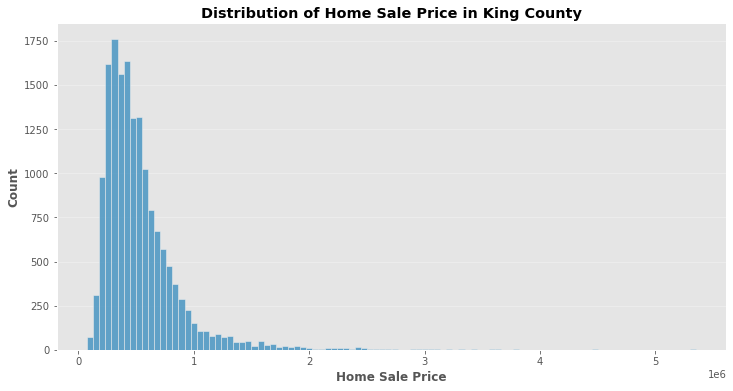

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(y_train, bins=100)

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Home Sale Price", weight = 'bold')
ax.set_ylabel("Count", weight = 'bold')
ax.set_title("Distribution of Home Sale Price in King County", weight = 'bold')

print('skewness:', skew(y_train))
print('kurtosis:', kurtosis(y_train));

Based on this distribution we can conclude the following: 

- The sale price distribution is highly positively skewed with a long right tail due to outliers. 

- The sale price distribution looks normally distrbuted, so we may need to adjust for the outliers in this set. 

Lets scale the target variable `price` using a log function to have a more normalized distribution. 

skewness: 0.4247839543928123
kurtosis: 0.6238016955208985


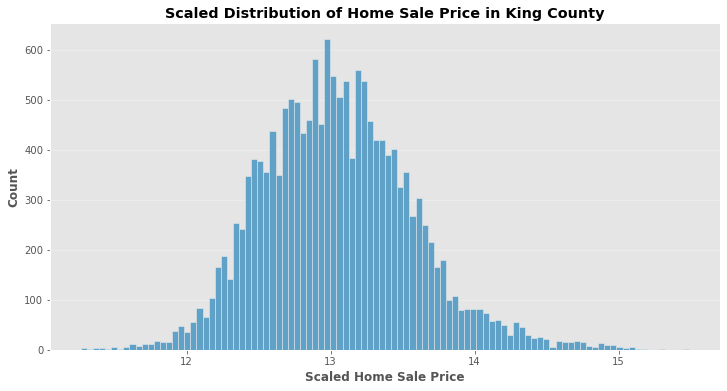

In [26]:
# scale the target variable y
y_train = np.log(y_train)

fig, ax = plt.subplots(figsize=(12, 6))

# replot the scaled y_train
sns.histplot(y_train, bins=100)

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Scaled Home Sale Price", weight = 'bold')
ax.set_ylabel("Count", weight = 'bold')
ax.set_title("Scaled Distribution of Home Sale Price in King County", weight = 'bold')

print('skewness:', skew(y_train))
print('kurtosis:', kurtosis(y_train))

plt.show()
fig.savefig('images/scaled_saleprice_distribution.png');

# 2. Initial Data Cleaning & Preprocessing

Before performing an initial test-train model of the dataset, let's first clean the data types so that the data types are properly labeled. Currently the dataset is not in the right format so any fitting of a model will fail. 

- Convert `date` to datetime
- Convert the `grade` to a numeric identifier
- Convert `sqft_basement` to a integer
- Drop some unnecessary columns (ie. `id`)

#### Converting Date to datetime

In [27]:
# convert to datetime
X_train['date'] = pd.to_datetime(X_train['date'])

Lets see what the dataset looks like when it comes to the range of data. We can visualize this further with the following histogram.

In [28]:
X_train['date'].sort_values()

9587    2014-05-02
16754   2014-05-02
21145   2014-05-02
775     2014-05-02
1040    2014-05-02
           ...    
20456   2015-05-14
11548   2015-05-14
5632    2015-05-15
13040   2015-05-24
16580   2015-05-27
Name: date, Length: 16189, dtype: datetime64[ns]

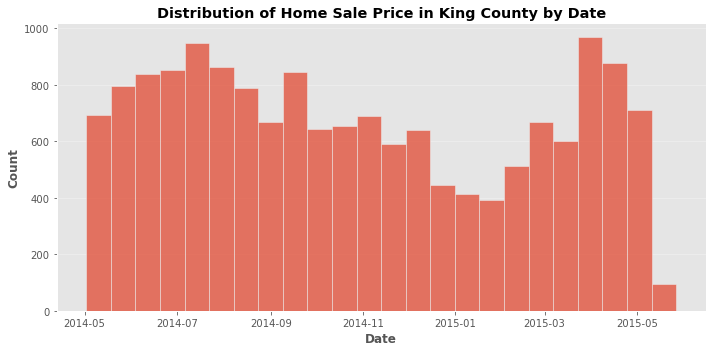

In [29]:
# simple plot to visualize distribution of sales throughout the datetime range
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(X_train['date'])

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Date", weight = 'bold')
ax.set_ylabel("Count", weight = 'bold')
ax.set_title("Distribution of Home Sale Price in King County by Date", weight = 'bold')

plt.tight_layout()
plt.show()
fig.savefig('images/distribution_sales_bydate.png')

So based off this histogram of the data, it looks like the dataset ranges between May of 2014 up until May of 2015. A few takeaways for now: 

- There may be some missing data for late May

- Based on the limited data, there may be a seasonal pattern for home sales there is a relative dip in sales during the winter months between November and March. 


However, moving foward, we will need to drop the `date` column since it will not be recognized in our model as a numerical column. 

In [30]:
# will need to drop the date column since this is not numerical
X_train.drop(columns = 'date', inplace = True)

#### Converting grade to numerical and as a categorical identifier value

In [31]:
# remove string categorical descriptions, 
X_train['grade'] = X_train['grade'].str.split(' ').str[0].str.strip()

# convert to int type for all values in grade column
X_train['grade'] = pd.to_numeric(X_train['grade']) 

X_train['grade']

18090    8
19824    7
9968     7
20027    8
2135     7
        ..
11971    7
21586    6
5393     9
860      5
15804    8
Name: grade, Length: 16189, dtype: int64

#### Converting `sq_basement` as a float & handling missing values

Looking at `sq_basement`, we have object type data in the column. Upon closer investigation, there are 454 `?` values in the column, thus explaining the data type discrepancy.  

In [32]:
X_train['sqft_basement'].value_counts()

0.0       9628
?          338
800.0      164
500.0      156
700.0      150
          ... 
415.0        1
1920.0       1
652.0        1
2550.0       1
2180.0       1
Name: sqft_basement, Length: 278, dtype: int64

We also observe that there are 12826 values where the square footage of the basement is 0. Thus, implying that the property does not have a basement. Using this same logic, we can expect that values with `?` are unknown and that we cannot assume that there is a quantity for SF of that property. Lets replace these unknown values with 0. 

In [33]:
# replace all ? values with 0.0
X_train['sqft_basement'] = X_train['sqft_basement'].replace({'?': 0.0})

# replace all 0.0 strings as 0
X_train['sqft_basement'] = X_train['sqft_basement'].replace({'0.0': 0})

# convert to int type for all values in sqft_basement column
X_train['sqft_basement'] = pd.to_numeric(X_train['sqft_basement']) 


In [34]:
# double check changes
X_train['sqft_basement'].value_counts()

0.0       9966
800.0      164
500.0      156
700.0      150
600.0      147
          ... 
2240.0       1
176.0        1
2490.0       1
248.0        1
2810.0       1
Name: sqft_basement, Length: 277, dtype: int64

#### Dropping irrelevant columns

In [35]:
# we'll keep these columns
relevant_columns = ['bedrooms', 
                    'bathrooms', 
                    'sqft_living', 
                    'sqft_lot',
                    'floors', 
                    'waterfront', 
                    'view', 
                    'condition', 
                    'grade', 
                    'sqft_above',
                    'sqft_basement', 
                    'yr_built',
                    'yr_renovated', 
                    'zipcode', 
                    'lat', 
                    'long',
                    'sqft_living15', 
                    'sqft_lot15']

# Reassign X_train so that it only contains relevant columns
X_train = X_train[relevant_columns]

# Check
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18090,2,2.50,1320,48787,1.0,NO,NONE,Average,8,1320,0.0,2004,0.0,98027,47.5157,-121.924,1830,155073
19824,4,2.50,2090,5195,2.0,NO,NONE,Average,7,2090,0.0,2007,0.0,98031,47.3986,-122.166,2090,5236
9968,3,2.50,2430,5715,2.0,NO,NONE,Average,7,2430,0.0,1999,NaN,98030,47.3718,-122.168,3040,5702
20027,5,4.00,1680,7268,1.0,NO,NONE,Average,8,1370,310.0,2008,0.0,98106,47.5571,-122.356,2040,8259
2135,3,2.25,1810,11800,1.0,NO,NONE,Average,7,1240,570.0,1977,NaN,98178,47.4997,-122.231,1810,5641


### Missing Values

In [36]:
# check missing values
X_train.isna().sum()

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1755
view               45
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2921
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We have missing values for `waterfront`, `view`, and `yr_renovated` columns. Lets further investigate what these missing values could possibly represent for now. 

### Preprocessing `waterfront`

In [37]:
# check possible values
X_train['waterfront'].value_counts()

NO     14330
YES      104
Name: waterfront, dtype: int64

In [38]:
# what do the missing values look like?
X_train[X_train['waterfront'].isna()].head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9711,6,2.0,1900,8240,1.0,NaN,NONE,Fair,7,1200,700.0,1964,0.0,98125,47.7037,-122.296,1900,8240
7739,3,1.0,1020,55756,1.0,NaN,NONE,Average,7,1020,0.0,1961,0.0,98042,47.3836,-122.082,1490,12745


Looks like the missing values are input into the dataframe as NaNs. Since there is no information in the data description about NaNs for waterfront properties, we can assume that the NaNs represent N/A or Not Available. The `waterfront` values are also already binary values of 'Yes' or 'No' so we dont need to fill in these NaNs with 0s. 

Lets replace these NaNs with N/A. 

In [39]:
# replace NaNs in waterfront with 'N/A'
X_train['waterfront'] = X_train['waterfront'].fillna("N/A")
X_train['waterfront'].value_counts()

NO     14330
N/A     1755
YES      104
Name: waterfront, dtype: int64

In [40]:
X_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18090,2,2.5,1320,48787,1.0,NO,NONE,Average,8,1320,0.0,2004,0.0,98027,47.5157,-121.924,1830,155073
19824,4,2.5,2090,5195,2.0,NO,NONE,Average,7,2090,0.0,2007,0.0,98031,47.3986,-122.166,2090,5236


We will OneHotEncode these values for `waterfront` since these are nominal values. 

In [41]:
# One hot encode categoricals
waterfront_ohe = pd.get_dummies(X_train['waterfront'], drop_first=True)

# Drop original waterfront column
X_train.drop('waterfront', axis=1, inplace=True)

In [42]:
#Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, waterfront_ohe], axis=1)

# Visually inspect X_train
X_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,NO,YES
18090,2,2.5,1320,48787,1.0,NONE,Average,8,1320,0.0,2004,0.0,98027,47.5157,-121.924,1830,155073,1,0
19824,4,2.5,2090,5195,2.0,NONE,Average,7,2090,0.0,2007,0.0,98031,47.3986,-122.166,2090,5236,1,0
9968,3,2.5,2430,5715,2.0,NONE,Average,7,2430,0.0,1999,NaN,98030,47.3718,-122.168,3040,5702,1,0


Ok great, lets move on to the other non-numerical columns. 

### Preprocessing `view`

In [43]:
# check possible values
X_train['view'].value_counts()

NONE         14570
AVERAGE        691
GOOD           396
FAIR           251
EXCELLENT      236
Name: view, dtype: int64

In [44]:
# what do the missing values look like?
X_train[X_train['view'].isna()].head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,NO,YES
13863,3,2.5,2588,5702,2.0,NaN,Average,8,2588,0.0,2008,NaN,98042,47.3453,-122.151,2403,5703,0,0
16748,4,3.0,2490,5064,2.0,NaN,Average,7,2490,0.0,2007,0.0,98056,47.5139,-122.189,2470,5064,1,0


The `view` refers to the quality of view from the house. This is a bit confusing since the column description also states the following: 

- Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other. 

However, the values for `view` are limited to ordinal values ranging from 'Fair' to 'Excellent'. This could be difficult to translate considering we do not know the exact address of each home as well as the connection between the ordinal value (ie. Excellent) and the corresponding view. 

For this reason, we will replace the missing NaNs with an already classified `NONE` value. 

Additionally, the values for `view` and `condition` columns are **ORDINAL**. We can change this column to represent numerical values of ordinal categorical variables. 

In [45]:
# replace NaNs in view with 'NONE'
X_train['view'] = X_train['view'].fillna('NONE')
X_train['view'].value_counts()

NONE         14615
AVERAGE        691
GOOD           396
FAIR           251
EXCELLENT      236
Name: view, dtype: int64

In [46]:
X_train['condition'].value_counts()

Average      10524
Good          4248
Very Good     1261
Fair           135
Poor            21
Name: condition, dtype: int64

In [47]:
# convert view and condition columns as category datatypes
X_train['view'] = X_train['view'].astype('category')
X_train['condition'] = X_train['condition'].astype('category')

# reorder the categories (based on documentation of the column)
# ordered from worst to best
X_train['view'] = X_train['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
X_train['condition'] = X_train['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])


# assign numerical values to each category
X_train['view'] = X_train['view'].cat.codes
X_train['condition'] = X_train['condition'].cat.codes


In [48]:
X_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,NO,YES
18090,2,2.5,1320,48787,1.0,0,2,8,1320,0.0,2004,0.0,98027,47.5157,-121.924,1830,155073,1,0
19824,4,2.5,2090,5195,2.0,0,2,7,2090,0.0,2007,0.0,98031,47.3986,-122.166,2090,5236,1,0
9968,3,2.5,2430,5715,2.0,0,2,7,2430,0.0,1999,NaN,98030,47.3718,-122.168,3040,5702,1,0


### Preprocessing `yr_renovated`

In [49]:
# check possible values
X_train['yr_renovated'].value_counts()

0.0       12698
2014.0       57
2013.0       26
2003.0       23
2005.0       22
          ...  
1944.0        1
1956.0        1
1971.0        1
1953.0        1
1972.0        1
Name: yr_renovated, Length: 65, dtype: int64

In [50]:
# what do the missing values look like?
X_train[X_train['yr_renovated'].isna()].head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,NO,YES
9968,3,2.50,2430,5715,2.0,0,2,7,2430,0.0,1999,NaN,98030,47.3718,-122.168,3040,5702,1,0
2135,3,2.25,1810,11800,1.0,0,2,7,1240,570.0,1977,NaN,98178,47.4997,-122.231,1810,5641,1,0


The `yr_renovated` column corresponds to when the house was renovated, if at all. NaN values likely indicate that the house has never experienced a home renovation. Upon closer investigation, there are also '0.0' values under this column which suggest the same thing. 

For the purposes of this analysis, it would make more sense to classify whether a home has been renovated at any point before and determine whether this has had an impact on the sale price. Thus, lets create a new column called `renovated` with a True or False value associated with each property. 

In [51]:
# create new column renovated if home has been renovated, 
X_train['renovated'] = X_train['yr_renovated'] > 0

In [52]:
X_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,NO,YES,renovated
18090,2,2.5,1320,48787,1.0,0,2,8,1320,0.0,2004,0.0,98027,47.5157,-121.924,1830,155073,1,0,False
19824,4,2.5,2090,5195,2.0,0,2,7,2090,0.0,2007,0.0,98031,47.3986,-122.166,2090,5236,1,0,False


In [53]:
# drop the yr_renovated column
X_train.drop(columns = 'yr_renovated', inplace = True)
X_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,NO,YES,renovated
18090,2,2.5,1320,48787,1.0,0,2,8,1320,0.0,2004,98027,47.5157,-121.924,1830,155073,1,0,False
19824,4,2.5,2090,5195,2.0,0,2,7,2090,0.0,2007,98031,47.3986,-122.166,2090,5236,1,0,False


In [54]:
# count bool values now
X_train['renovated'].value_counts()

False    15619
True       570
Name: renovated, dtype: int64

In [55]:
# convert false and true values for renovated into binary values
X_train['renovated'] = X_train['renovated'].astype(int)
X_train['renovated'].value_counts()

0    15619
1      570
Name: renovated, dtype: int64

### Modified `yr_built`

So far all other columns are some sort of integer type. However, when proceeding to modeling, it would make more sense to classify homes based on age rather than the year it was built. 

We will now create a new column called `age` which will calculate the age for each property up to 2015 (reflecting the year when the data set was retrieved). 

Note: for the purposes of moving forward in this analysis, we will assume buildings built in 2015 have an age of 1 year (to not have zero values when transforming later on).

In [56]:
# create new age column determined by difference from 2015
X_train['age'] = 2016 - X_train['yr_built']

# drop yr_built
X_train.drop(columns = 'yr_built', inplace = True)

X_train.tail(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,NO,YES,renovated,age
5393,4,1.75,2450,13300,1.0,0,3,9,1630,820.0,98006,47.5564,-122.130,3150,15500,1,0,0,29
860,1,0.75,380,15000,1.0,0,2,5,380,0.0,98168,47.4810,-122.323,1170,15000,1,0,0,53
15804,4,2.75,2414,7693,2.0,0,2,8,2414,0.0,98002,47.3046,-122.222,1500,7177,1,0,0,10


Lets perform a final check now:

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16189 entries, 18090 to 15804
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16189 non-null  int64  
 1   bathrooms      16189 non-null  float64
 2   sqft_living    16189 non-null  int64  
 3   sqft_lot       16189 non-null  int64  
 4   floors         16189 non-null  float64
 5   view           16189 non-null  int8   
 6   condition      16189 non-null  int8   
 7   grade          16189 non-null  int64  
 8   sqft_above     16189 non-null  int64  
 9   sqft_basement  16189 non-null  float64
 10  zipcode        16189 non-null  int64  
 11  lat            16189 non-null  float64
 12  long           16189 non-null  float64
 13  sqft_living15  16189 non-null  int64  
 14  sqft_lot15     16189 non-null  int64  
 15  NO             16189 non-null  uint8  
 16  YES            16189 non-null  uint8  
 17  renovated      16189 non-null  int64  
 18  ag

In [58]:
X_train.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
NO               0
YES              0
renovated        0
age              0
dtype: int64

In [59]:
X_train.tail()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,NO,YES,renovated,age
11971,4,1.75,2310,8045,1.0,0,3,7,1650,660.0,98058,47.4569,-122.165,1790,8086,1,0,0,40
21586,3,1.75,1500,11968,1.0,0,2,6,1500,0.0,98010,47.3095,-122.002,1320,11303,0,0,0,2
5393,4,1.75,2450,13300,1.0,0,3,9,1630,820.0,98006,47.5564,-122.130,3150,15500,1,0,0,29
860,1,0.75,380,15000,1.0,0,2,5,380,0.0,98168,47.4810,-122.323,1170,15000,1,0,0,53
15804,4,2.75,2414,7693,2.0,0,2,8,2414,0.0,98002,47.3046,-122.222,1500,7177,1,0,0,10


Great, now that we've handled all the missing values and did some preprocessing and have all numerical values, lets now look at the data.

# 3. Testing Regression Models (Price as the Target)

Lets now go through an iterative investigation process to test out our train sets and make necessary adjustments based on the model's performance. 

## 2nd Model (after initial preprocessing)

In [60]:
# rename X_train variable for second model train
second_model_X_train = X_train

In [61]:
second_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(second_model_X_train)).fit()
second_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     2884.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:51   Log-Likelihood:                -577.41
No. Observations:               16189   AIC:                             1195.
Df Residuals:                   16169   BIC:                             1349.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -13.4411      4.160     -3.231      0.001     -21.595      -5.287
bedrooms         -0.0156      0.003     -5.417      0.000      -0.021      -0.010
bathrooms         0.0690      0.005     14.575      0.000       0.060       0.078
sqft_living       0.0001   2.56e-05      5.377      0.000    8.76e-05       0.000
sqft_lot       5.031e-07   6.98e-08      7.203      0.000    3.66e-07     6.4e-07
floors            0.0756      0.005     14.648      0.000       0.066       0.086
view              0.0616      0.003     20.228      0.000       0.056       0.068
condition         0.0603      0.003     17.838      0.000       0.054       0.067
grade             0.1583      0.003     50.780      0.000       0.152       0.164
sqft_above     5.134e-06   2.56e-05      0.201      0.841    -4.5e-05    5.53e-05
sqft_basement  2.459e-05   2.53e-05      0.970      0.332   -2.51e-05    7.43e-05
zipcode          -0.0006   4.75e-05    -13.211      0.000      -0.001      -0.001
lat               1.4009      0.016     90.343      0.000       1.371       1.431
long             -0.1572      0.019     -8.325      0.000      -0.194      -0.120
sqft_living15  9.525e-05   5.03e-06     18.953      0.000    8.54e-05       0.000
sqft_lot15    -2.759e-07   1.06e-07     -2.609      0.009   -4.83e-07   -6.86e-08
NO                0.0077      0.006      1.212      0.226      -0.005       0.020
YES               0.4209      0.027     15.432      0.000       0.367       0.474
renovated         0.0837      0.011      7.411      0.000       0.062       0.106
age               0.0034      0.000     32.939      0.000       0.003       0.004
==============================================================================
Omnibus:                      207.406   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.995
Skew:                          -0.009   Prob(JB):                     5.04e-83
Kurtosis:                       3.749   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation**: Our R2 value increased to 0.772 simply by preprocessing the training set data. Compared to our previous baseline model (R2 = 0.48), we have increased the R2 by about 0.28!

However, our condition number is very large. See Note [2]. There are multicollinearity problems in our second model. This was expected due to the fact we included all these predictor variables which may or may not have multicollinearity with each other. 

In [62]:
# instantiate the linear regression model
second_model_lr = LinearRegression()
second_model_lr

# Fit our model
second_model_lr.fit(second_model_X_train, y_train)

# Get our R2 score
print('2nd Model Train R2:', round(second_model_lr.score(second_model_X_train, y_train), 4))
print()

# cross validate the second model
second_model_scores = cross_validate(
    estimator = second_model_lr,
    X = second_model_X_train,
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("2nd Model Train score:", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score: ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score:     ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(),4))

2nd Model Train R2: 0.7721

Validation Checks
2nd Model Train score: 0.7714
2nd Model Test score:  0.7737

Baseline Model Train score:      0.4833
Baseline Model Validation score: 0.4889


Checking the validation of my second model, we further confirm that the second model performed significantly better than the baseline model and has a higher validation score as well. 

**IMPORTANT NOTE:** I have not included the `Test R2` because I have not yet transformed and scaled the test set yet. I will aim to do this at the end once I have a satisfactory R2. As an alternative, I will be checking for validation on the test set throughout, which should be a good indicator that the test set will also perform well. 

## Feature Selection

Given that we included all predictors in the second model, there was bound to be some sort of confounding relationship between the predictor variables. So lets take a closer look at the distributions and nature of each predictor and try selectively choosing variables to include in the next model. 


In [63]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 
            'floors', 'view','condition', 
            'grade', 'sqft_above', 'sqft_basement', 
            'zipcode', 'lat', 'long', 
            'sqft_living15', 'sqft_lot15', 'renovated',
            'age']

# assign to X_third 
X_third = X_train[features]

### Scaling the Predictors

Earlier, we log scaled the target variable price but didnt do the same for the predictor variables. Lets do the same now for the predictors that are **continuous** variables to create a more normal distribution and see how that also impacts our overall R2. 

To visualize the distribution of our remaining predictors, see below of non-normal distributions that may need to be scaled. Note that some of the remaining variables are non-continuous and are discrete categorical variables. Thus, scaling the discrete categorical variables will not be necessary. 

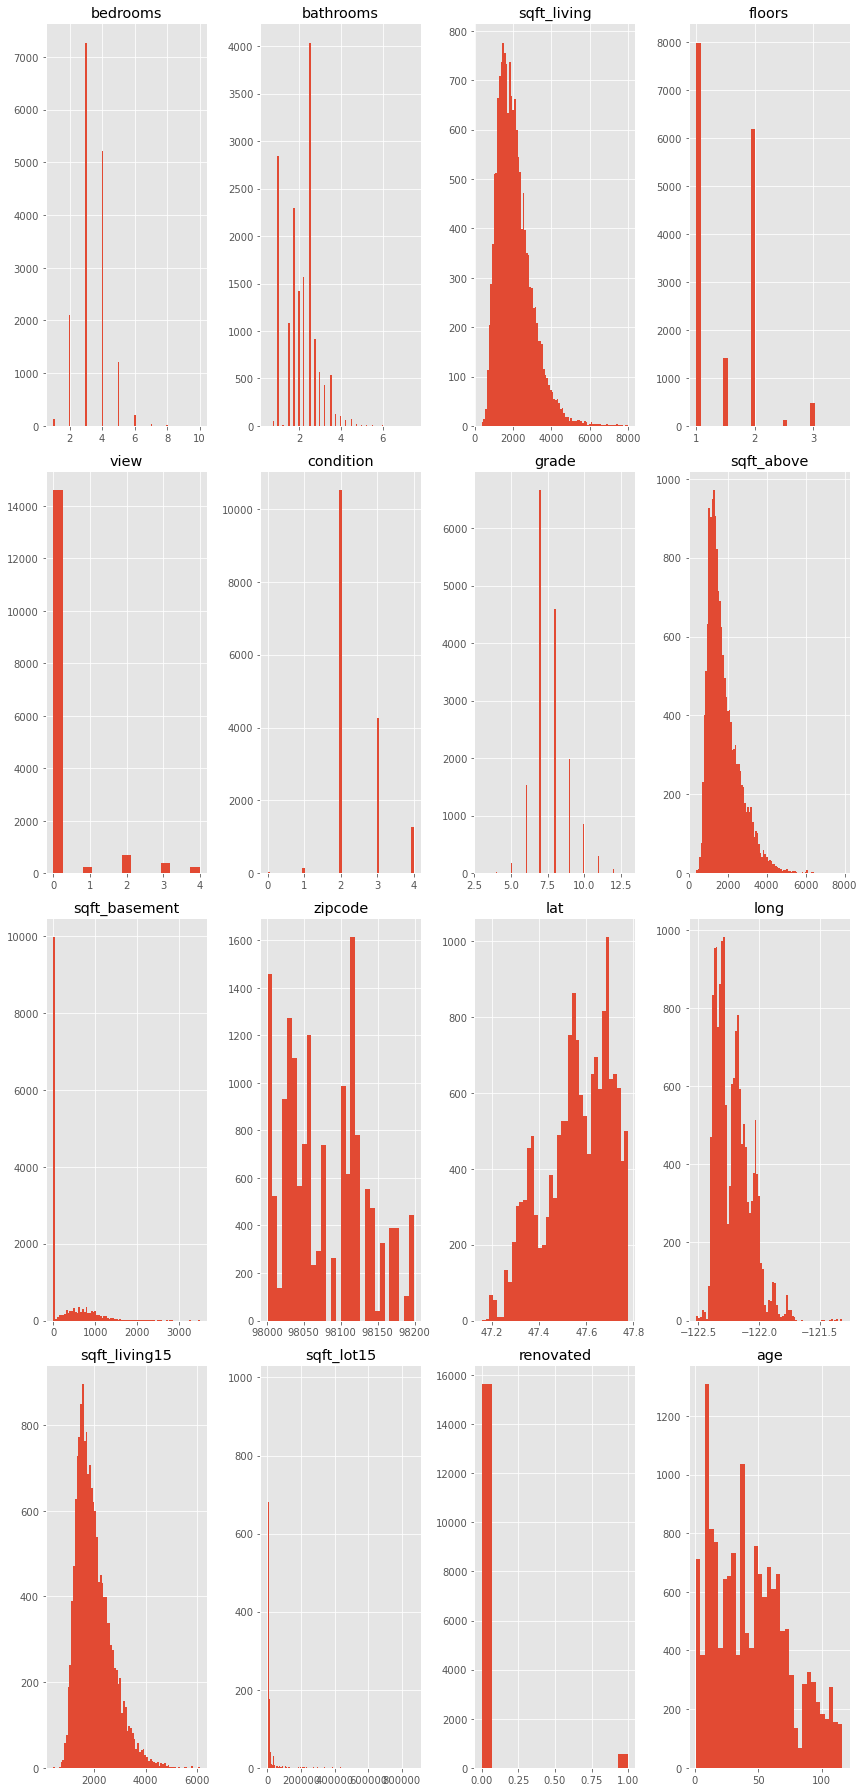

In [64]:
# set up figure for remaining predictor variables in X_third
fig, axes = plt.subplots(nrows=(X_third.shape[1] // 4), ncols=4, figsize=(12,25))

# for each col in X_third, plot distribution
for col, ax in zip(X_third, axes.flatten()):
    ax.hist(X_third[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

Based on this distibution of our remaining predictors, I will scale the following continuous variables only: 

- `sqft_living`
- `sqft_above`
- `sqft_living15`
- `age`
- `bathrooms`

Note that the `sqft_basement` has many 0 values (likely associated with many properties without a basement), we may move forward without `sqft_basement` as a predictor for now as it seems like there are other related variables that provide more significance.  

Also, while latitude and longitude are classified as continuous variables, we will not select these predictors for log scaling as it doesn't make sense when it comes to scaling a value assoicated with specific locations. 


In [65]:
# choose continous variable columns to log
cont = ['sqft_living','sqft_above',  
        'sqft_living15','age']

# assign to X_cont
X_cont = X_third[cont]

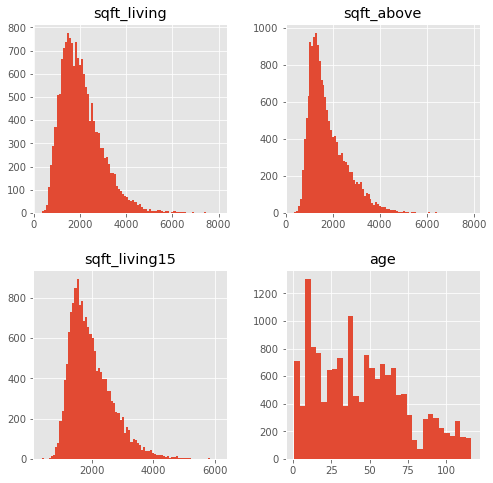

In [66]:
# to see distribution before logging
X_cont.hist(figsize  = [8, 8], bins='auto');

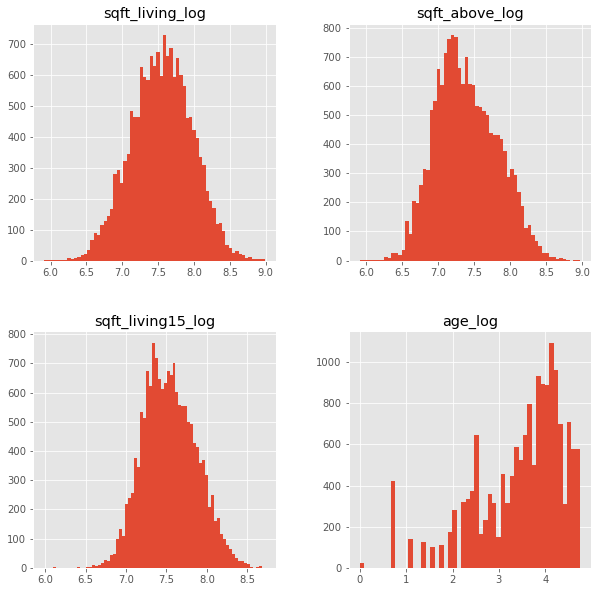

In [67]:
# perform log on continuous variables
log_names = [f'{column}_log' for column in X_cont.columns]

cont_log = np.log(X_cont)
cont_log.columns = log_names
cont_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();


In [68]:
# preview 
cont_log.head(2)

,sqft_living_log,sqft_above_log,sqft_living15_log,age_log
18090,7.185387,7.185387,7.512071,2.484907
19824,7.644919,7.644919,7.644919,2.197225


In [69]:
# preview
X_third.head(2)

,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,age
18090,2,2.5,1320,1.0,0,2,8,1320,0.0,98027,47.5157,-121.924,1830,155073,0,12
19824,4,2.5,2090,2.0,0,2,7,2090,0.0,98031,47.3986,-122.166,2090,5236,0,9


In [70]:
X_third.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated', 'age'],
      dtype='object')

In [71]:
#join the two dataframes
X_third_train = cont_log.join(X_third)
X_third_train.head(2)

,sqft_living_log,sqft_above_log,sqft_living15_log,age_log,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,age
18090,7.185387,7.185387,7.512071,2.484907,2,2.5,1320,1.0,0,2,8,1320,0.0,98027,47.5157,-121.924,1830,155073,0,12
19824,7.644919,7.644919,7.644919,2.197225,4,2.5,2090,2.0,0,2,7,2090,0.0,98031,47.3986,-122.166,2090,5236,0,9


In [72]:
# need to drop the extra repeat columns that werent logged
X_third_train.drop(columns = ['age', 'sqft_lot15', 'sqft_living15', 
                              'sqft_living', 'lat', 'long',
                              'sqft_basement', 'sqft_above'], inplace = True)

In [73]:
X_third_train.head()

,sqft_living_log,sqft_above_log,sqft_living15_log,age_log,bedrooms,bathrooms,floors,view,condition,grade,zipcode,renovated
18090,7.185387,7.185387,7.512071,2.484907,2,2.50,1.0,0,2,8,98027,0
19824,7.644919,7.644919,7.644919,2.197225,4,2.50,2.0,0,2,7,98031,0
9968,7.795647,7.795647,8.019613,2.833213,3,2.50,2.0,0,2,7,98030,0
20027,7.426549,7.222566,7.620705,2.079442,5,4.00,1.0,0,2,8,98106,0
2135,7.501082,7.122867,7.501082,3.663562,3,2.25,1.0,0,2,7,98178,0


### Preprocessing `zipcode` via. OHE

Since `zipcode` is a numerical value, it will run fine in our model. However, technically, zipcodes are nominal values and can be one-hot encoded as well. Let's convert this column similar to the `waterfront` column. 

In [74]:
# One hot encode categoricals
zipcode_ohe = pd.get_dummies(X_third_train['zipcode'], drop_first=True)

# Drop original zipcode column
X_third_train.drop('zipcode', axis=1, inplace=True)

#Concatenate the new dataframe with X_third_train, call new train set with zipcodes X_third_train_zip
X_third_train_zip = pd.concat([X_third_train, zipcode_ohe], axis=1)

# Visually inspect X_third_train_zip
X_third_train_zip.head(3)

,sqft_living_log,sqft_above_log,sqft_living15_log,age_log,bedrooms,bathrooms,floors,view,condition,grade,renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
18090,7.185387,7.185387,7.512071,2.484907,2,2.5,1.0,0,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19824,7.644919,7.644919,7.644919,2.197225,4,2.5,2.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9968,7.795647,7.795647,8.019613,2.833213,3,2.5,2.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3rd  Model (Removed high p-values, log numerical variables, added encoded zipcodes)

In [75]:
third_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_third_train_zip)).fit()
third_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1400.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:57   Log-Likelihood:                 4234.9
No. Observations:               16189   AIC:                            -8308.
Df Residuals:                   16108   BIC:                            -7685.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.8324      0.057    120.490      0.000       6.721       6.944
sqft_living_log       0.2934      0.010     29.785      0.000       0.274       0.313
sqft_above_log        0.1987      0.009     21.839      0.000       0.181       0.217
sqft_living15_log     0.1697      0.008     21.545      0.000       0.154       0.185
age_log              -0.0023      0.002     -0.954      0.340      -0.007       0.002
bedrooms             -0.0179      0.002     -7.942      0.000      -0.022      -0.013
bathrooms             0.0290      0.003      8.336      0.000       0.022       0.036
floors               -0.0643      0.004    -14.750      0.000      -0.073      -0.056
view                  0.0858      0.002     39.677      0.000       0.082       0.090
condition             0.0572      0.003     22.294      0.000       0.052       0.062
grade                 0.0929      0.002     39.824      0.000       0.088       0.097
renovated             0.0958      0.008     11.483      0.000       0.079       0.112
98002                -0.0079      0.019     -0.410      0.682      -0.046       0.030
98003                 0.0019      0.017      0.109      0.913      -0.032       0.036
98004                 1.1173      0.017     65.919      0.000       1.084       1.151
98005                 0.7311      0.021     35.114      0.000       0.690       0.772
98006                 0.6170      0.015     40.101      0.000       0.587       0.647
98007                 0.6446      0.022     29.725      0.000       0.602       0.687
98008                 0.6445      0.017     37.102      0.000       0.610       0.679
98010                 0.2540      0.025     10.095      0.000       0.205       0.303
98011                 0.4387      0.019     22.854      0.000       0.401       0.476
98014                 0.3419      0.023     14.957      0.000       0.297       0.387
98019                 0.3425      0.020     17.380      0.000       0.304       0.381
98022                 0.0661      0.019      3.540      0.000       0.030       0.103
98023                -0.0336      0.015     -2.234      0.025      -0.063      -0.004
98024                 0.4974      0.026     19.067      0.000       0.446       0.548
98027                 0.5212      0.016     33.216      0.000       0.490       0.552
98028                 0.4071      0.017     23.649      0.000       0.373       0.441
98029                 0.5853      0.017     34.897      0.000       0.552       0.618
98030                 0.0472      0.017      2.703      0.007       0.013       0.081
98031                 0.0769      0.018      4.365      0.000       0.042       0.111
98032                -0.0212      0.023     -0.918      0.358      -0.066       0.024
98033                 0.7769      0.016     49.731      0.000       0.746

In [76]:
# instantiate the linear regression model
third_model_lr = LinearRegression()
third_model_lr

# Fit our model
third_model_lr.fit(X_third_train_zip, y_train)

# Get our R2 score
print('3rd Model Train R2:', round(third_model_lr.score(X_third_train_zip, y_train), 4))
print()
             
# cross validate the third model
third_model_scores = cross_validate(
    estimator = third_model_lr,
    X = X_third_train_zip,
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("3rd Model Train score:     ", round(third_model_scores["train_score"].mean(),4))
print("3rd Model Test score:      ", round(third_model_scores["test_score"].mean(),4))
print()
print("2nd Model Train score:     ", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score:      ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score:     ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Test score:      ", round(baseline_scores["test_score"].mean(),4))

3rd Model Train R2: 0.8743

Validation Checks
3rd Model Train score:      0.875
3rd Model Test score:       0.8711

2nd Model Train score:      0.7714
2nd Model Test score:       0.7737

Baseline Model Train score:      0.4833
Baseline Model Test score:       0.4889


**Interpretation**: Our R2 increased to 0.874 once we removed some excess predictors, log scaled our numerical variables, and OHE the zipcodes. Notably, the condition number is still high, but reduced significantly down to a lesser value compared to the 2nd model. 

This might mean we'll need to remove some excess predictors or examine the relationship between the predictors more closely. 

### Standard Scaling

Let's now apply a Standard Scaler on the most recent train set and see if that does anything to the performance of the model. 

In [77]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

# # Now we'll apply it to our data by using the .fit() and .transform() methods.
ss.fit(X_third_train_zip)
X_fourth_scaled = ss.transform(X_third_train_zip)

# need to relabel the columns after loss of name from preprocessing scaler
X_fourth_scaled = pd.DataFrame(X_third_train_zip, columns = X_third_train_zip.columns)
X_fourth_scaled

,sqft_living_log,sqft_above_log,sqft_living15_log,age_log,bedrooms,bathrooms,floors,view,condition,grade,renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
18090,7.185387,7.185387,7.512071,2.484907,2,2.50,1.0,0,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19824,7.644919,7.644919,7.644919,2.197225,4,2.50,2.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9968,7.795647,7.795647,8.019613,2.833213,3,2.50,2.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20027,7.426549,7.222566,7.620705,2.079442,5,4.00,1.0,0,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2135,7.501082,7.122867,7.501082,3.663562,3,2.25,1.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,7.745003,7.408531,7.489971,3.688879,4,1.75,1.0,0,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21586,7.313220,7.313220,7.185387,0.693147,3,1.75,1.0,0,2,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5393,7.803843,7.396335,8.055158,3.367296,4,1.75,1.0,0,3,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,5.940171,5.940171,7.064759,3.970292,1,0.75,1.0,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 4th  Model (applied Standard Scaler)

In [78]:
# fourth model after scaling
fourth_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_fourth_scaled)).fit()
fourth_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1400.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:58   Log-Likelihood:                 4234.9
No. Observations:               16189   AIC:                            -8308.
Df Residuals:                   16108   BIC:                            -7685.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.8324      0.057    120.490      0.000       6.721       6.944
sqft_living_log       0.2934      0.010     29.785      0.000       0.274       0.313
sqft_above_log        0.1987      0.009     21.839      0.000       0.181       0.217
sqft_living15_log     0.1697      0.008     21.545      0.000       0.154       0.185
age_log              -0.0023      0.002     -0.954      0.340      -0.007       0.002
bedrooms             -0.0179      0.002     -7.942      0.000      -0.022      -0.013
bathrooms             0.0290      0.003      8.336      0.000       0.022       0.036
floors               -0.0643      0.004    -14.750      0.000      -0.073      -0.056
view                  0.0858      0.002     39.677      0.000       0.082       0.090
condition             0.0572      0.003     22.294      0.000       0.052       0.062
grade                 0.0929      0.002     39.824      0.000       0.088       0.097
renovated             0.0958      0.008     11.483      0.000       0.079       0.112
98002                -0.0079      0.019     -0.410      0.682      -0.046       0.030
98003                 0.0019      0.017      0.109      0.913      -0.032       0.036
98004                 1.1173      0.017     65.919      0.000       1.084       1.151
98005                 0.7311      0.021     35.114      0.000       0.690       0.772
98006                 0.6170      0.015     40.101      0.000       0.587       0.647
98007                 0.6446      0.022     29.725      0.000       0.602       0.687
98008                 0.6445      0.017     37.102      0.000       0.610       0.679
98010                 0.2540      0.025     10.095      0.000       0.205       0.303
98011                 0.4387      0.019     22.854      0.000       0.401       0.476
98014                 0.3419      0.023     14.957      0.000       0.297       0.387
98019                 0.3425      0.020     17.380      0.000       0.304       0.381
98022                 0.0661      0.019      3.540      0.000       0.030       0.103
98023                -0.0336      0.015     -2.234      0.025      -0.063      -0.004
98024                 0.4974      0.026     19.067      0.000       0.446       0.548
98027                 0.5212      0.016     33.216      0.000       0.490       0.552
98028                 0.4071      0.017     23.649      0.000       0.373       0.441
98029                 0.5853      0.017     34.897      0.000       0.552       0.618
98030                 0.0472      0.017      2.703      0.007       0.013       0.081
98031                 0.0769      0.018      4.365      0.000       0.042       0.111
98032                -0.0212      0.023     -0.918      0.358      -0.066       0.024
98033                 0.7769      0.016     49.731      0.000       0.746

In [79]:
# instantiate the linear regression model
fourth_model_lr = LinearRegression()
fourth_model_lr

# Fit our model
fourth_model_lr.fit(X_fourth_scaled, y_train)

# Get our R2 score
print('4th Model Train R2:', round(fourth_model_lr.score(X_fourth_scaled, y_train), 4))
print()

# cross validate the fourth model
fourth_model_scores = cross_validate(
    estimator = fourth_model_lr,
    X = X_fourth_scaled,
    y = y_train,
    return_train_score=True,
    cv=splitter
)
print("Validation Checks")
print("4th Model Train score:", round(fourth_model_scores["train_score"].mean(),4))
print("4th Model Test score: ", round(fourth_model_scores["test_score"].mean(),4))
print()
print("3rd Model Train score:", round(third_model_scores["train_score"].mean(),4))
print("3rd Model Test score: ", round(third_model_scores["test_score"].mean(),4))
print()
print("2nd Model Train score:", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score: ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score: ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Test score:  ", round(baseline_scores["test_score"].mean(),4))

4th Model Train R2: 0.8743

Validation Checks
4th Model Train score: 0.875
4th Model Test score:  0.8711

3rd Model Train score: 0.875
3rd Model Test score:  0.8711

2nd Model Train score: 0.7714
2nd Model Test score:  0.7737

Baseline Model Train score:  0.4833
Baseline Model Test score:   0.4889


So applying a standardized scaler does not impact the model compared to the 3rd model. This is probably because the continuous predictors have already been log-scaled, but good to know. Lets move on.

# 4. Check for Multicollinearity aka Investigating Inference Variables

While the purposes of this investigation are to provide a predictive model, I want to see if there will be a change or improvement in the R2 if we isolate and remove variables causing colinearity. Changes in one variable may be associated in huge changes in another variable, thus causing issues interpretting the coefficients associated with the predictors. 

Lets first look at the relationship between variables by making a correlational heatmap between the predictor variables. We will use the predictor variables in the `X_third_train` since this does not include all those other zipcodes which would otherwise be a mess. I'll reintroduce the zipcodes after investigating colinearity. 

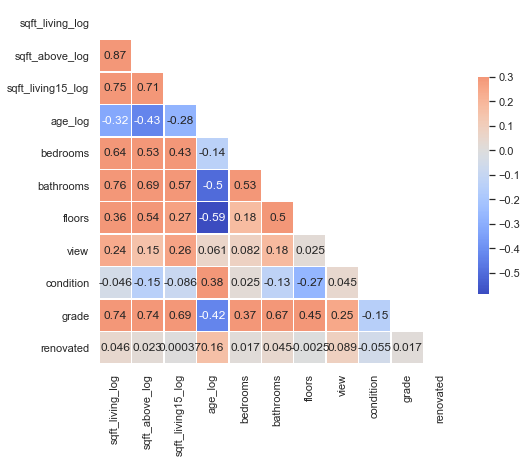

In [80]:
# create a correlation viz of predictor variables only
sns.set_theme(style="white")

# set up figure size
fig, ax = plt.subplots(figsize=(8, 8))

# set up correlation matrix with _third_train variables
corr = X_third_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask = mask, cmap = 'coolwarm', vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {'shrink': 0.5}, annot = True)

plt.show()

In [81]:
# returns true if correlations are bigger than 0.75
abs(X_third_train.corr()) > 0.75

,sqft_living_log,sqft_above_log,sqft_living15_log,age_log,bedrooms,bathrooms,floors,view,condition,grade,renovated
sqft_living_log,True,True,True,False,False,True,False,False,False,False,False
sqft_above_log,True,True,False,False,False,False,False,False,False,False,False
sqft_living15_log,True,False,True,False,False,False,False,False,False,False,False
age_log,False,False,False,True,False,False,False,False,False,False,False
bedrooms,False,False,False,False,True,False,False,False,False,False,False
bathrooms,True,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False
grade,False,False,False,False,False,False,False,False,False,True,False


Using `stack` and `zip` to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1. 

In [82]:
corr_df = X_third_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)

In [83]:
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_living_log, sqft_above_log)",0.865190
"(sqft_living_log, bathrooms)",0.761335
"(sqft_living15_log, sqft_living_log)",0.750639


So it looks like our original predictor variable, `sqft_living` (aka now transformed to `sqft_living_log`) is causing a high correlation with other variables and likely leading to multicollinearity in the dataset. 

The definition for `sqft_living` is described as the "square footage of living space in the home". However, another predictor in `sqft_above` is defined as the "square footage of house apart from basement". 

- drop `sqft_above_log` since values are already captured in `sqft_living_log`
- drop `sqft_living15_log` since we only care about the living space SF and not neighbors. 

In [84]:
# create a 5th training set using the 3rd training set 
X_fifth_train = X_third_train

# drop sqft_above_log because of multicolinearity
X_fifth_train.drop(columns=['sqft_above_log','sqft_living15_log'], inplace=True)

In [85]:
X_fifth_train.head()

,sqft_living_log,age_log,bedrooms,bathrooms,floors,view,condition,grade,renovated
18090,7.185387,2.484907,2,2.50,1.0,0,2,8,0
19824,7.644919,2.197225,4,2.50,2.0,0,2,7,0
9968,7.795647,2.833213,3,2.50,2.0,0,2,7,0
20027,7.426549,2.079442,5,4.00,1.0,0,2,8,0
2135,7.501082,3.663562,3,2.25,1.0,0,2,7,0


## 5th Model (removed colinear variables)

In [86]:
# fifth model after checking colinearity
fifth_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_fifth_train)).fit()
fifth_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2807.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:01:00   Log-Likelihood:                -4935.5
No. Observations:               16189   AIC:                             9891.
Df Residuals:                   16179   BIC:                             9968.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.7959      0.073    106.508      0.000       7.652       7.939
sqft_living_log     0.3925      0.012     31.529      0.000       0.368       0.417
age_log             0.1098      0.004     27.663      0.000       0.102       0.118
bedrooms           -0.0349      0.004     -8.989      0.000      -0.043      -0.027
bathrooms           0.0439      0.006      7.299      0.000       0.032       0.056
floors              0.0867      0.006     13.845      0.000       0.074       0.099
view                0.0835      0.004     23.308      0.000       0.077       0.091
condition           0.0642      0.004     14.687      0.000       0.056       0.073
grade               0.2118      0.004     58.573      0.000       0.205       0.219
renovated           0.1277      0.015      8.775      0.000       0.099       0.156
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.021
Skew:                           0.003   Prob(JB):                        0.990
Kurtosis:                       3.002   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# instantiate the linear regression model
fifth_model_lr = LinearRegression()
fifth_model_lr

# Fit our model
fifth_model_lr.fit(X_fifth_train, y_train)

# Get our R2 score
print('5th Model Train R2:', round(fifth_model_lr.score(X_fifth_train, y_train), 4))
print()

# cross validate the fifth model
fifth_model_scores = cross_validate(
    estimator = fifth_model_lr,
    X = X_fifth_train,
    y = y_train,
    return_train_score=True,
    cv=splitter
)
print("Validation Checks")
print("5th Model Train score:", round(fifth_model_scores["train_score"].mean(),4))
print("5th Model Test score: ", round(fifth_model_scores["test_score"].mean(),4))
print()
print("4th Model Train score:", round(fourth_model_scores["train_score"].mean(),4))
print("4th Model Test score: ", round(fourth_model_scores["test_score"].mean(),4))
print()
print("3rd Model Train score:", round(third_model_scores["train_score"].mean(),4))
print("3rd Model Test score: ", round(third_model_scores["test_score"].mean(),4))
print()
print("2nd Model Train score:", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score: ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score: ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Test score:  ", round(baseline_scores["test_score"].mean(),4))

5th Model Train R2: 0.6096

Validation Checks
5th Model Train score: 0.6091
5th Model Test score:  0.6108

4th Model Train score: 0.875
4th Model Test score:  0.8711

3rd Model Train score: 0.875
3rd Model Test score:  0.8711

2nd Model Train score: 0.7714
2nd Model Test score:  0.7737

Baseline Model Train score:  0.4833
Baseline Model Test score:   0.4889


## 6th Model (reintroduce encoded zipcodes)

Lets now re-add the OHE zipcode to the `X_fifth_train` and see how this performs. 

In [88]:
#Concatenate the fifth train with the zipcode_ohe from earlier
X_sixth_train_zip = pd.concat([X_fifth_train, zipcode_ohe], axis=1)

# Visually inspect X_sixth_train_zip
X_sixth_train_zip.head(3)

,sqft_living_log,age_log,bedrooms,bathrooms,floors,view,condition,grade,renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
18090,7.185387,2.484907,2,2.5,1.0,0,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19824,7.644919,2.197225,4,2.5,2.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9968,7.795647,2.833213,3,2.5,2.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# sixth model after checking colinearity and add zipcodes
sixth_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_sixth_train_zip)).fit()
sixth_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1337.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:01:00   Log-Likelihood:                 3729.4
No. Observations:               16189   AIC:                            -7301.
Df Residuals:                   16110   BIC:                            -6693.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.8669      0.046    170.947      0.000       7.777       7.957
sqft_living_log     0.4920      0.008     65.033      0.000       0.477       0.507
age_log             0.0048      0.003      1.900      0.057      -0.000       0.010
bedrooms           -0.0183      0.002     -7.872      0.000      -0.023      -0.014
bathrooms           0.0172      0.004      4.822      0.000       0.010       0.024
floors             -0.0209      0.004     -5.326      0.000      -0.029      -0.013
view                0.0900      0.002     40.996      0.000       0.086       0.094
condition           0.0498      0.003     18.909      0.000       0.045       0.055
grade               0.1167      0.002     51.157      0.000       0.112       0.121
renovated           0.0871      0.009     10.138      0.000       0.070       0.104
98002              -0.0181      0.020     -0.917      0.359      -0.057       0.021
98003              -0.0079      0.018     -0.445      0.656      -0.043       0.027
98004               1.1341      0.017     65.011      0.000       1.100       1.168
98005               0.7454      0.021     34.758      0.000       0.703       0.787
98006               0.6232      0.016     39.411      0.000       0.592       0.654
98007               0.6446      0.022     28.829      0.000       0.601       0.688
98008               0.6369      0.018     35.555      0.000       0.602       0.672
98010               0.2680      0.026     10.328      0.000       0.217       0.319
98011               0.4519      0.020     22.860      0.000       0.413       0.491
98014               0.3445      0.024     14.607      0.000       0.298       0.391
98019               0.3623      0.020     17.833      0.000       0.322       0.402
98022               0.0757      0.019      3.931      0.000       0.038       0.113
98023              -0.0396      0.015     -2.557      0.011      -0.070      -0.009
98024               0.5211      0.027     19.371      0.000       0.468       0.574
98027               0.5234      0.016     32.404      0.000       0.492       0.555
98028               0.4103      0.018     23.130      0.000       0.375       0.445
98029               0.5852      0.017     33.841      0.000       0.551       0.619
98030               0.0545      0.018      3.029      0.002       0.019       0.090
98031               0.0780      0.018      4.290      0.000       0.042       0.114
98032              -0.0471      0.024     -1.982      0.047      -0.094      -0.001
98033               0.7799      0.016     48.425      0.000       0.748       0.811
98034               0.5298      0.015     34.571      0.000       0.500       0.560
98038               0.1889      0.015     12.508      0.000       0.159       0.219
98039               1.3322      0.035     38.137      0.000

In [90]:
# instantiate the linear regression model
sixth_model_lr = LinearRegression()
sixth_model_lr

# Fit our model
sixth_model_lr.fit(X_sixth_train_zip, y_train)

# Get our R2 score
print('6th Model Train R2:', round(sixth_model_lr.score(X_sixth_train_zip, y_train), 4))
print()

# cross validate the fifth model
sixth_model_scores = cross_validate(
    estimator = sixth_model_lr,
    X = X_sixth_train_zip,
    y = y_train,
    return_train_score=True,
    cv=splitter
)
print("Validation Checks")
print("6th Model Train score:", round(sixth_model_scores["train_score"].mean(),4))
print("6th Model Test score: ", round(sixth_model_scores["test_score"].mean(),4))
print()
print("5th Model Train score:", round(fifth_model_scores["train_score"].mean(),4))
print("5th Model Test score: ", round(fifth_model_scores["test_score"].mean(),4))
print()
print("4th Model Train score:", round(fourth_model_scores["train_score"].mean(),4))
print("4th Model Test score: ", round(fourth_model_scores["test_score"].mean(),4))
print()
print("3rd Model Train score:", round(third_model_scores["train_score"].mean(),4))
print("3rd Model Test score: ", round(third_model_scores["test_score"].mean(),4))
print()
print("2nd Model Train score:", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score: ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score: ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Test score:  ", round(baseline_scores["test_score"].mean(),4))

6th Model Train R2: 0.8662

Validation Checks
6th Model Train score: 0.867
6th Model Test score:  0.8626

5th Model Train score: 0.6091
5th Model Test score:  0.6108

4th Model Train score: 0.875
4th Model Test score:  0.8711

3rd Model Train score: 0.875
3rd Model Test score:  0.8711

2nd Model Train score: 0.7714
2nd Model Test score:  0.7737

Baseline Model Train score:  0.4833
Baseline Model Test score:   0.4889


# 5. Model Selection/Conclusions

- Choose the 4th Model because it had the highest R2, also has more predictors I care about. 
- The 6th Model removed many predictors but addressed colinearity between the predictors. 
- Apply transformations to the `y_test` and compare results to training set. 

## Transform and Preprocess the `X_test` up to 4th Model

The following functions and code summarizes the steps done earlier with regards to cleaning and preprocessing. The functions have been applied to the `X_test` set as follows:

- `clean_data` drops unnecessary columns, and cleans the date, grade, and basement columns to integer values. 

- `encoding` creates nominal values for waterfront, view, condition and yr_built columns.

- `log_features` log scales the continuous predictors and drops unnecessary columns not logged.

- `encoding_zip` encodes the zipcodes and concats zipcodes back to the previous dataframe set.

- `standard_scaler` applies a standardized scaling to the final dataframe set. 

In [91]:
# create a function that cleans the date, grade, basement columns
def clean_data(df, iden, date, grade, basement):
    # drops id column
    df.drop(columns = iden, axis=1, inplace = True)
    
    # drops date column
    df.drop(columns = date, axis=1, inplace = True)
    
    # clean grade column
    # remove string categorical descriptions, 
    df[grade] = df[grade].str.split(' ').str[0].str.strip()
    # convert to int type for all values in grade column
    df[grade] = pd.to_numeric(df[grade]) 
    
    # clean sq_ft_basement column
    # replace all ? values with 0.0 # replace all 0.0 strings as 0
    df[basement][df[basement] == '?'] = 0.0
    df[basement][df[basement] == '0.0'] = 0
    # convert to int type for all values in sqft_basement column
    df[basement] = pd.to_numeric(df[basement]) 
    
    # we'll keep these columns moving forward 
    relevant_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 
                        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'lat', 
                        'long','sqft_living15']
    
    df = df[relevant_columns]

    return df

In [92]:
X_clean = clean_data(X_test, 'id', 'date', 'grade', 'sqft_basement')

In [93]:
# create a function that encodes the waterfront, view, condition and yr_built columns
def encoding(df, waterfront, view, condition, renovated, yr_built):
    # ----- waterfront ----- #
    # replace NaNs in waterfront with 'N/A'
    df[waterfront] = df[waterfront].fillna("N/A")
    
    # One hot encode categoricals
    waterfront_ohe = pd.get_dummies(df[waterfront], drop_first=True)
    
    # Drop original waterfront column
    df.drop(waterfront, axis=1, inplace=True)
    
    #Concatenate the new dataframe with current X_test
    df = pd.concat([df, waterfront_ohe], axis=1)

    # ----- view & condition ----- #
    # replace NaNs in view with 'NONE'
    df[view] = df[view].fillna('NONE')
    # convert view and condition columns as category datatypes
    df[view] = df[view].astype('category')
    df[condition] = df[condition].astype('category')
    # reorder the categories (based on documentation of the column)
    # ordered from worst to best
    df[view] = df[view] .cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
    df[condition] = df[condition].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])
    # assign numerical values to each category
    df[view] = df[view].cat.codes
    df[condition] = df[condition].cat.codes
    
    # ----- renovated ----- #
    # create new column renovated if home has been renovated, 
    df['renovated'] = df[renovated] > 0
    # drop the yr_renovated column
    df.drop(columns = renovated, inplace = True)
    # convert false and true values for renovated into binary values
    df['renovated'] = df['renovated'].astype(int)
    
    # ----- age ----- #
    # create new column to determine age
    df['age'] = 2016 - df[yr_built]
    # drop yr_built
    df.drop(columns = yr_built, inplace = True)
    
    return df

In [94]:
X_encoded = encoding(X_clean, 'waterfront', 'view', 'condition', 'yr_renovated', 'yr_built')

In [95]:
# create a function that log scales continuous variables 
def log_features(df):
    features = ['bedrooms', 'bathrooms', 'sqft_living', 
            'floors', 'view','condition', 
            'grade', 'sqft_above', 'sqft_basement', 
            'zipcode', 'lat', 'long', 
            'sqft_living15', 'renovated',
            'age']
    
    # assign features to df_test
    df_test = df[features]
    
    # choose continous variable columns to log
    cont = ['sqft_living','sqft_above',  
        'sqft_living15','age']
    
    # assign to X_third_test_cont
    df_test_cont = df_test[cont]
    
    # perform log on continuous variables
    log_names = [f'{column}_log' for column in df_test_cont.columns]
    
    cont_log = np.log(df_test_cont)
    cont_log.columns = log_names
    
    #join the two dataframes
    df_test = cont_log.join(df_test)
    
    # need to drop the extra repeat columns that werent logged
    df_test.drop(columns = ['age', 'sqft_living15', 
                              'sqft_living', 'lat', 'long',
                              'sqft_basement', 'sqft_above'], inplace = True)
    
    return df_test

In [96]:
X_logged = log_features(X_encoded)

In [97]:
# creates a function that encodes zipcode and concats to dataframe
def encoding_zip(df, zipcode):
    # One hot encode zipcodes
    zipcode_ohe = pd.get_dummies(df[zipcode], drop_first=True)
    # Drop original zipcode column
    df.drop(zipcode, axis=1, inplace=True)
    #Concatenate the new dataframe with X_third_train, call new train set with zipcodes X_third_train_zip
    df_zipped = pd.concat([df, zipcode_ohe], axis=1)
    
    return df_zipped

In [98]:
X_logged_zip = encoding_zip(X_logged, 'zipcode')

In [99]:
# creates a standard scale of the df
def standard_scaler(df):
    ss = StandardScaler()
    
    # # Now we'll apply it to our data by using the .fit() and .transform() methods.
    ss.fit(df)
    df_scaled = ss.transform(df)
    
    # need to relabel the columns after loss of name from preprocessing scaler
    df_scaled = pd.DataFrame(df, columns = df.columns)
    return df_scaled

In [100]:
X_test_final = standard_scaler(X_logged_zip)

### Final Check After Preprocessing:

In [101]:
X_test_final.head(3)

,sqft_living_log,sqft_above_log,sqft_living15_log,age_log,bedrooms,bathrooms,floors,view,condition,grade,renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
20123,7.306531,7.106606,7.306531,1.791759,3,2.25,2.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7830,7.727535,7.727535,7.673223,4.007333,4,2.00,1.0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3821,7.162397,7.162397,7.467371,3.583519,3,1.75,1.0,0,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Ready to Model (Using 4th Model):

In [102]:
# rescale the target variable y
y_test = np.log(y_test)

In [103]:
# fourth model after scaling
fourth_model_OLS_test = sm.OLS(endog=y_test, exog=sm.add_constant(X_test_final)).fit()
fourth_model_OLS_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     449.5
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:01:01   Log-Likelihood:                 1381.0
No. Observations:                5397   AIC:                            -2600.
Df Residuals:                    5316   BIC:                            -2066.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.9279      0.101     68.599      0.000       6.730       7.126
sqft_living_log       0.2998      0.017     17.771      0.000       0.267       0.333
sqft_above_log        0.1918      0.016     11.894      0.000       0.160       0.223
sqft_living15_log     0.1587      0.014     11.576      0.000       0.132       0.186
age_log              -0.0016      0.004     -0.384      0.701      -0.010       0.007
bedrooms             -0.0157      0.004     -4.030      0.000      -0.023      -0.008
bathrooms             0.0253      0.006      4.231      0.000       0.014       0.037
floors               -0.0512      0.008     -6.608      0.000      -0.066      -0.036
view                  0.0856      0.004     22.315      0.000       0.078       0.093
condition             0.0628      0.004     14.038      0.000       0.054       0.072
grade                 0.0894      0.004     21.717      0.000       0.081       0.097
renovated             0.0850      0.015      5.496      0.000       0.055       0.115
98002                -0.0358      0.033     -1.083      0.279      -0.101       0.029
98003                 0.0132      0.030      0.441      0.659      -0.046       0.072
98004                 1.0914      0.029     37.463      0.000       1.034       1.149
98005                 0.7068      0.034     21.051      0.000       0.641       0.773
98006                 0.6450      0.026     24.904      0.000       0.594       0.696
98007                 0.6242      0.037     16.928      0.000       0.552       0.697
98008                 0.6379      0.029     21.661      0.000       0.580       0.696
98010                 0.3360      0.039      8.531      0.000       0.259       0.413
98011                 0.4212      0.034     12.407      0.000       0.355       0.488
98014                 0.4274      0.038     11.379      0.000       0.354       0.501
98019                 0.3213      0.032      9.936      0.000       0.258       0.385
98022                 0.0432      0.030      1.453      0.146      -0.015       0.102
98023                -0.0324      0.026     -1.255      0.209      -0.083       0.018
98024                 0.5016      0.051      9.853      0.000       0.402       0.601
98027                 0.5197      0.027     18.968      0.000       0.466       0.573
98028                 0.4118      0.030     13.777      0.000       0.353       0.470
98029                 0.5644      0.029     19.567      0.000       0.508       0.621
98030                 0.0262      0.032      0.810      0.418      -0.037       0.090
98031                 0.0327      0.029      1.133      0.257      -0.024       0.089
98032                -0.0181      0.036     -0.496      0.620      -0.089       0.053
98033                 0.7622      0.026     28.958      0.000       0.711

In [104]:
# instantiate the linear regression model
fourth_model_lr = LinearRegression()
fourth_model_lr

# Fit our model 
fourth_model_lr.fit(X_fourth_scaled, y_train)

# Get our R2 score
print('4th Model Train R2:', round(fourth_model_lr.score(X_fourth_scaled, y_train), 4))
print('4th Model Test R2:', round(fourth_model_lr.score(X_test_final, y_test), 4))
print()

# Calculate predictions on training and test sets for 4th model
train_preds = fourth_model_lr.predict(X_fourth_scaled)
test_preds = fourth_model_lr.predict(X_test_final)

# Calculate training and test MSE
# need to apply np.exp to scale
train_rmse = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(train_preds)))
test_rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(test_preds)))
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 4)))

4th Model Train R2: 0.8743
4th Model Test R2: 0.8684

Train Root Mean Squarred Error: 139905.4892867977
Test Root Mean Squarred Error: 131025.48301270237
Difference in RMSE for Test/Train: 8880.0063


In [105]:
# check predictor coefficients
fourth_model_lr.coef_

array([ 0.29341854,  0.19873168,  0.16972128, -0.00233739, -0.01788488,
        0.02898095, -0.06430453,  0.08584003,  0.05716574,  0.09288094,
        0.0957731 , -0.00787934,  0.00188294,  1.11730464,  0.73108042,
        0.61700714,  0.64456844,  0.64451038,  0.25400465,  0.43874568,
        0.34193335,  0.34254404,  0.06611311, -0.03356868,  0.49735946,
        0.52121129,  0.40707389,  0.58534326,  0.04718848,  0.07692061,
       -0.02118123,  0.77689116,  0.53822221,  0.16622315,  1.29381784,
        0.87580684,  0.06651627,  0.3401498 ,  0.62543676,  0.5953692 ,
        0.14506519,  0.31879686,  0.16327297,  0.33374935,  0.3982541 ,
        0.41626757,  0.49657526,  0.55350622,  0.55134044,  0.48163653,
        0.02249973,  0.976755  ,  0.83235807,  0.95753404,  0.38852109,
        0.86110118,  0.38482397,  1.00410858,  1.05547437,  0.82814449,
        0.75872207,  0.81939346,  0.48575821,  0.97279776,  0.81542606,
        0.56461234,  0.56924725,  0.48298015,  0.69603767,  0.68

In [106]:
# intercept
fourth_model_lr.intercept_

6.832373022996645

In [107]:
# find predicted values
fourth_model_lr.predict(X_fourth_scaled)

array([12.98878139, 12.60091398, 12.72535406, ..., 13.49061794,
       11.58437926, 12.63062678])

### Predicted Linear Regression Plots & Residuals

In [108]:
# 1st set of redisduals on train set
residuals_train = (train_preds - y_train)

# 2nd set of redisduals on test set
residuals_test = (test_preds - y_test)

### Training Set

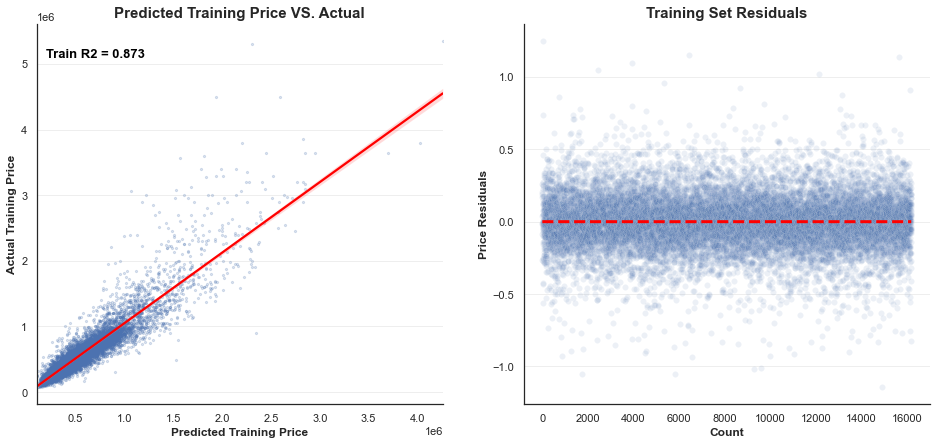

In [109]:
# plots TRAINING set & residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# plots regplots
sns.regplot(ax = axes[0], 
            x = np.exp(train_preds), 
            y = np.exp(y_train),
            scatter_kws={'s':5, 'alpha': 0.2},
            line_kws={"color": "red"})

# annotate regplot
axes[0].text(0.20*10**6, 5.1*10**6, "Train R2 = 0.873", 
             horizontalalignment='left', fontsize=13, color='black', weight = 'bold')
# regplot labels
axes[0].set_xlabel('Predicted Training Price', weight = 'bold') 
axes[0].set_ylabel('Actual Training Price', weight = 'bold') 
axes[0].set_title('Predicted Training Price VS. Actual', weight = 'bold', fontdict = {'fontsize' : 15})

# plots residual
sns.scatterplot(ax = axes[1], 
                x=range(y_train.shape[0]),
                y= residuals_train, 
                alpha=0.1)
# plot zero line in residual
sns.lineplot(ax = axes[1], 
             x=range(y_train.shape[0]), y = 0, 
             color='red', linestyle="dashed", linewidth = 3)
# residual labels
axes[1].set_xlabel('Count', weight = 'bold') 
axes[1].set_ylabel('Price Residuals', weight = 'bold') 
axes[1].set_title('Training Set Residuals', weight = 'bold', fontdict = {'fontsize' : 15})

# removes top and right side axis
sns.despine(right = True)

# set gridline visibility
axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True, color='#EEEEEE')
axes[0].xaxis.grid(False)
axes[1].set_axisbelow(True)
axes[1].yaxis.grid(True, color='#EEEEEE')
axes[1].xaxis.grid(False)

plt.show()
fig.savefig('images/trainingset.png');

### Testing Set

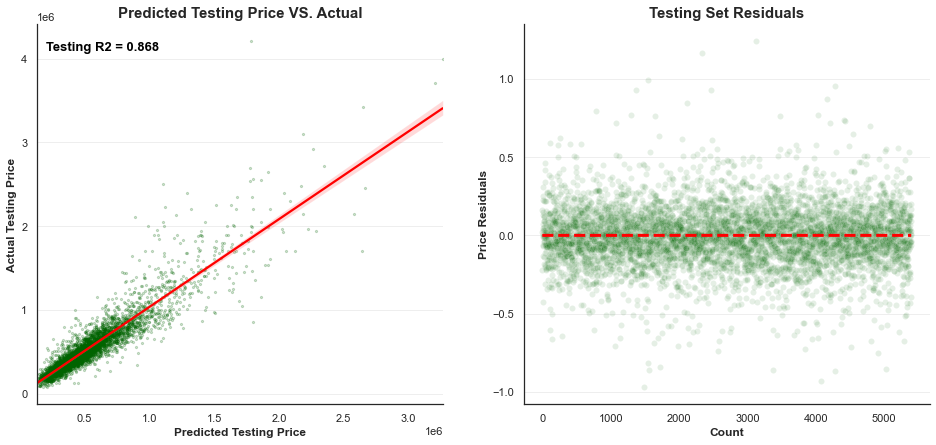

In [110]:
# plots TESTING set & residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# plots regplots
sns.regplot(ax = axes[0], 
            x = np.exp(test_preds), 
            y = np.exp(y_test),
            scatter_kws={'s':5, 'alpha': 0.2, 'color': 'darkgreen'},
            line_kws={"color": "red"})

# annotate regplot
axes[0].text(0.20*10**6, 4.1*10**6, "Testing R2 = 0.868", 
             horizontalalignment='left', fontsize=13, color='black', weight = 'bold')
# regplot labels
axes[0].set_xlabel('Predicted Testing Price', weight = 'bold') 
axes[0].set_ylabel('Actual Testing Price', weight = 'bold') 
axes[0].set_title('Predicted Testing Price VS. Actual', weight = 'bold', fontdict = {'fontsize' : 15})

# plots residual
sns.scatterplot(ax = axes[1], 
                x = range(y_test.shape[0]),
                y = residuals_test, 
                alpha=0.1,
                color= "darkgreen")
# plot zero line in residual
sns.lineplot(ax = axes[1], 
             x=range(y_test.shape[0]), y = 0, 
             color='red', linestyle="dashed", linewidth = 3)
# residual labels
axes[1].set_xlabel('Count', weight = 'bold') 
axes[1].set_ylabel('Price Residuals', weight = 'bold') 
axes[1].set_title('Testing Set Residuals', weight = 'bold', fontdict = {'fontsize' : 15})

# removes top and right side axis
sns.despine(right = True)

# set gridline visibility
axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True, color='#EEEEEE')
axes[0].xaxis.grid(False)
axes[1].set_axisbelow(True)
axes[1].yaxis.grid(True, color='#EEEEEE')
axes[1].xaxis.grid(False)

plt.show()
fig.savefig('images/testingset.png');

# Create an input to predict home prices based on variables

Using the predictor variables in the final model (4th Model), select random homes from the training set to be input into our linear regression model to predict a price of that home. 

In [111]:
# create a new column for input of values to determine sale price
new_row = pd.DataFrame(columns = X_fourth_scaled.columns)
new_row

,sqft_living_log,sqft_above_log,sqft_living15_log,age_log,bedrooms,bathrooms,floors,view,condition,grade,renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199


### Highest Priced Zipcode Areas

Create a bar plot of the top 5 zipcodes (areas) where the most expensive homes are located using the training data. 

Shows which areas are undervalued or overpriced. Potential profits in undervalued areas. 

In [167]:
# reindexes the testing set dataframe
new = X_test_final.reset_index()

In [168]:
# drops index
new = new.drop(['index'], axis = 1)

In [169]:
# create a new dataframe with predicted values using new
preds = fourth_model_lr.predict(new)
preds = pd.DataFrame(preds).rename(columns={0: "predicted_scaled_price"})

# rescale predicted prices
preds['predicted_price'] = np.exp(preds['predicted_scaled_price'])

In [171]:
# recall we have our y_test, reassign to a df_price to be used for this analysis
df_price = pd.DataFrame(y_test)
df_price = df_price.rename(columns={"price": "scaled_price"})

# assign zipcodes from X_test zipcode column
zipcodes = pd.DataFrame(X_test['zipcode'])

# combine the two new dfs of price and zipcodes
top_zips = pd.concat([zipcodes, df_price], axis=1)

# adds actual price column
top_zips['actual_price'] = np.exp(top_zips['scaled_price'])

In [178]:
# reset index of top_zips because we want to prepare to merge with preds on same indices
top_zips_new = top_zips.reset_index()
top_zips_new = top_zips_new.drop(['index'], axis = 1)


In [179]:
# merge the preds and top_zips_new on same index
merged = top_zips_new.merge(preds, left_index=True, right_index=True, how='left')
merged.head(3)

,zipcode,scaled_price,actual_price,predicted_scaled_price,predicted_price
0,98106,12.641097,309000.0,12.660401,315023.025739
1,98001,12.834681,375000.0,12.615040,301052.400451
2,98042,12.278142,214946.0,12.437282,252024.558547


In [180]:
# finds average price for each grouped zipcode
# sorts values in descending
sorted_zipcodes = merged.groupby('zipcode').mean('actual_price').sort_values(by = 'actual_price', ascending = False)

# give me the top 20 most expensive zipcodes
most_expensive = sorted_zipcodes.head(20)
most_expensive.reset_index(inplace = True)

Finally ready to plot the predicted test price values against the actual prices. 

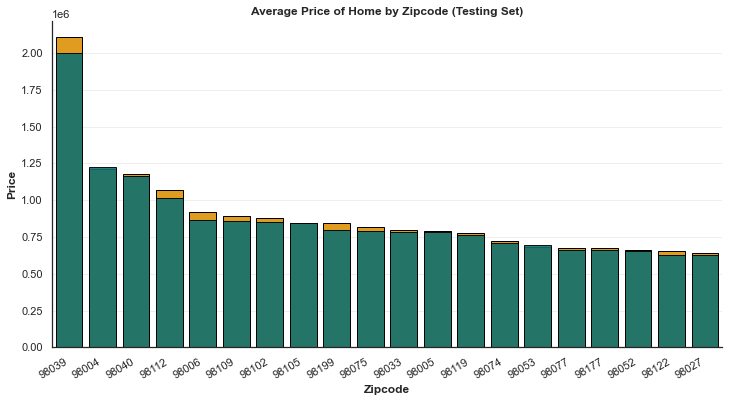

In [181]:
# plot highest average price of home by zipcode
fig, ax = plt.subplots(figsize=(12, 6))

# plots actual price
ax = sns.barplot(data = most_expensive,
           x = 'zipcode',
           y = 'actual_price',
           edgecolor = 'black',
           linewidth = 1,
           order= most_expensive.sort_values('actual_price', ascending = False).zipcode,
           color = 'orange')

# plots predicted price
ax = sns.barplot(data = most_expensive,
           x = 'zipcode',
           y = 'predicted_price',
           edgecolor = 'black',
           linewidth = 1,
           order= most_expensive.sort_values('predicted_price', ascending = False).zipcode,
           color = 'teal',
           alpha = 0.9)

# rotate xticks labels
plt.xticks(rotation=30, ha='right')

# set labels
ax.set_title("Average Price of Home by Zipcode (Testing Set)", weight = "bold")
ax.set_ylabel("Price", weight = "bold")
ax.set_xlabel("Zipcode", weight = "bold")

# removes top and right side axis
sns.despine(right = True)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show()

In [123]:
# finds average price for each grouped zipcode
# sorts values in descending
sorted_zipcodes = top_zips.groupby('zipcode').mean('scaled_price').sort_values(by = 'scaled_price', ascending = False)


In [124]:
# give me the top 20 most expensive zipcodes
most_expensive = sorted_zipcodes.head(20)
most_expensive['price'] = np.exp(most_expensive['scaled_price'])
most_expensive.reset_index(inplace = True)

In [125]:
most_expensive.head()

,zipcode,scaled_price,actual_price,price
0,98039,14.412823,1.947571e+06,1.817229e+06
1,98004,14.024049,1.377803e+06,1.231877e+06
2,98040,13.898755,1.184066e+06,1.086808e+06
3,98112,13.784876,1.103135e+06,9.698296e+05
4,98109,13.595240,8.955227e+05,8.023013e+05


In [126]:
# create a new variable states with a list of the values
top_zipcodes = list(most_expensive.index)

# create a new variable deaths with a list of the values
top_prices = list(most_expensive['price'].values)


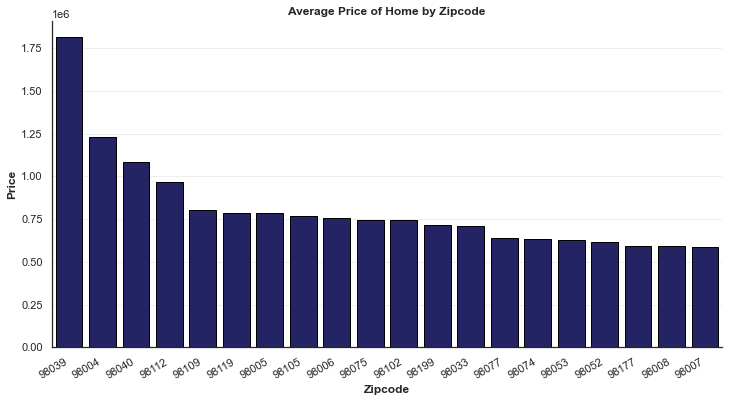

In [127]:
# plot highest average price of home by zipcode
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data = most_expensive,
           x = 'zipcode',
           y = 'price',
           edgecolor = 'black',
           order= most_expensive.sort_values('price', ascending = False).zipcode,
           color = 'midnightblue')

# rotate xticks labels
plt.xticks(rotation=30, ha='right')

# set labels
ax.set_title("Average Price of Home by Zipcode", weight = "bold")
ax.set_ylabel("Price", weight = "bold")
ax.set_xlabel("Zipcode", weight = "bold")

# removes top and right side axis
sns.despine(right = True)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show()

predictions - KCHA make a profit? what dictates price
compare the price of homes by zipcode (and keeping all else constant)